### Vanilla Saliency


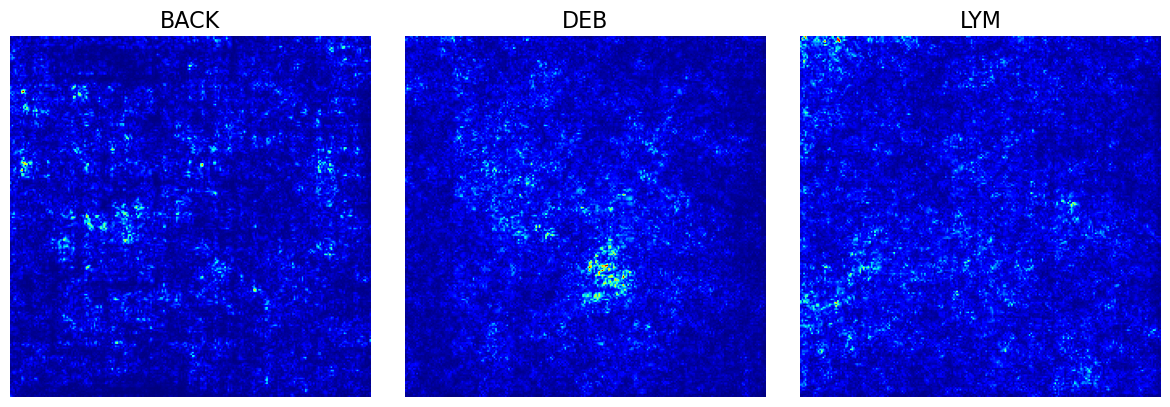

In [11]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import backend as K

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

import matplotlib.pyplot as plt

import numpy as np


model = load_model('models/resnet_50_10e.h5')


replace2linear = ReplaceToLinear()


img1 = load_img('NCT-CRC-HE-small/BACK/BACK-AAHIIGKS.tif.jpg', target_size=(224, 224))
img2 = load_img('NCT-CRC-HE-small/DEB/DEB-AAGWLDAI.tif.jpg', target_size=(224, 224))
img3 = load_img('NCT-CRC-HE-small/LYM/LYM-ADHLDHYC.tif.jpg', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])
image_titles = ['BACK', 'DEB', 'LYM']


score = CategoricalScore([1, 2, 3])

saliency = Saliency(
    model,
    model_modifier=replace2linear,
    clone=True
)

X = preprocess_input(images)

saliency_map = saliency(score, X)


f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()